<a href="https://colab.research.google.com/github/brainmentorspvtltd/IGDTU_PyTorchTraining/blob/main/IG_HAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

os.environ["KAGGLE_USERNAME"] = "ravikanttyagi"
os.environ["KAGGLE_KEY"] = "095a21c789eb4728fde2b29230033273"

!kaggle datasets download meetnagadia/human-action-recognition-har-dataset

 99% 295M/297M [00:08<00:00, 37.2MB/s]
100% 297M/297M [00:08<00:00, 35.4MB/s]


In [16]:
!unzip human-action-recognition-har-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Human Action Recognition/train/Image_5499.jpg  
  inflating: Human Action Recognition/train/Image_55.jpg  
  inflating: Human Action Recognition/train/Image_550.jpg  
  inflating: Human Action Recognition/train/Image_5500.jpg  
  inflating: Human Action Recognition/train/Image_5501.jpg  
  inflating: Human Action Recognition/train/Image_5502.jpg  
  inflating: Human Action Recognition/train/Image_5503.jpg  
  inflating: Human Action Recognition/train/Image_5504.jpg  
  inflating: Human Action Recognition/train/Image_5505.jpg  
  inflating: Human Action Recognition/train/Image_5506.jpg  
  inflating: Human Action Recognition/train/Image_5507.jpg  
  inflating: Human Action Recognition/train/Image_5508.jpg  
  inflating: Human Action Recognition/train/Image_5509.jpg  
  inflating: Human Action Recognition/train/Image_551.jpg  
  inflating: Human Action Recognition/train/Image_5510.jpg  
  inflating: Human Action Recognition/

In [4]:
# PIL
# opencv

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
import torch
from torch import nn

# **Explore Dataset**

In [18]:
train_path = "Human Action Recognition/train"
test_path = "Human Action Recognition/test"

In [19]:
random_img = train_path + "/" + "Image_5.jpg"

In [20]:
img = cv2.imread(random_img)

In [21]:
type(img)

numpy.ndarray

In [22]:
img.shape

(210, 240, 3)

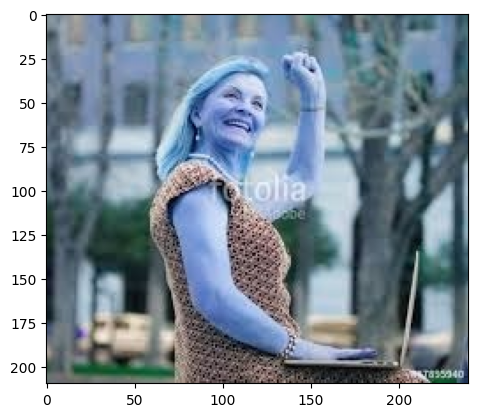

In [23]:
plt.imshow(img)
plt.show()

In [24]:
df = pd.read_csv("Human Action Recognition/Training_set.csv")

In [25]:
df.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [37]:
pd.value_counts(df['label'])

sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: label, dtype: int64

In [58]:
class_names = pd.value_counts(df['label']).index

In [61]:
class_names = np.sort(class_names)
print(class_names)

['calling' 'clapping' 'cycling' 'dancing' 'drinking' 'eating' 'fighting'
 'hugging' 'laughing' 'listening_to_music' 'running' 'sitting' 'sleeping'
 'texting' 'using_laptop']


In [26]:
df.iloc[545]

filename    Image_546.jpg
label             hugging
Name: 545, dtype: object

In [27]:
filenames = df['filename'].values

In [28]:
filenames[:10]

array(['Image_1.jpg', 'Image_2.jpg', 'Image_3.jpg', 'Image_4.jpg',
       'Image_5.jpg', 'Image_6.jpg', 'Image_7.jpg', 'Image_8.jpg',
       'Image_9.jpg', 'Image_10.jpg'], dtype=object)

In [29]:
df['label'][0]

'sitting'

In [30]:
def load_data(path, df):
  images_list = []
  labels_list = []
  for i in tqdm(range(len(filenames))):
    # concat train_path with image name
    img_path = path + "/" + filenames[i]
    # fetch image label from data frame of current image
    img_label = df['label'][i]
    # read image using opencv
    img = cv2.imread(img_path)
    # resize image because images might be of different dimensions
    # in order to maintain array, we have to resize all the images in same dimension
    img = cv2.resize(img, (150,150))
    # store images one by one in your list
    images_list.append(img)
    labels_list.append(img_label)

  images_arr = np.asarray(images_list)
  labels_arr = np.asarray(labels_list)

  return images_arr, labels_arr

In [31]:
train_df = pd.read_csv("Human Action Recognition/Training_set.csv")
# test_df = pd.read_csv("Human Action Recognition/Testing_set.csv")

In [32]:
# test_df.head()

In [33]:
train_images, train_labels = load_data(train_path, train_df)

100%|██████████| 12600/12600 [00:12<00:00, 1021.05it/s]


In [34]:
train_images.shape

(12600, 150, 150, 3)

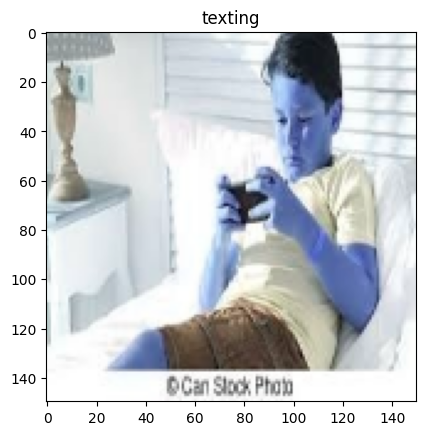

In [62]:
plt.imshow(train_images[1670])
plt.title(class_names[train_labels[1670]])
plt.show()

In [50]:
train_labels[0]

'sitting'

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [53]:
np.unique(train_labels, return_counts=True)

(array(['calling', 'clapping', 'cycling', 'dancing', 'drinking', 'eating',
        'fighting', 'hugging', 'laughing', 'listening_to_music', 'running',
        'sitting', 'sleeping', 'texting', 'using_laptop'], dtype='<U18'),
 array([840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840,
        840, 840]))

In [54]:
label = LabelEncoder()
train_labels = label.fit_transform(train_labels)

In [55]:
np.unique(train_labels, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840, 840,
        840, 840]))

In [63]:
# 75% - training and 25% - testing
x_train, x_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=0.25)

In [64]:
x_train.shape

(9450, 150, 150, 3)

In [65]:
x_test.shape

(3150, 150, 150, 3)

In [67]:
# Normalization
x_train, x_test = x_train / 255.0, x_test / 255.0

In [69]:
x_train[0][0][0]

array([0.14509804, 0.20392157, 0.21568627])

In [47]:
class AlexNet(nn.Module):
  def __init__(self, num_classes=15):
    super().__init__()
    self.cnn_blocks = nn.Sequential(
        nn.Conv2d(3, 96, kernel_size=11, stride=4),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(96, 256, kernel_size=3, stride=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
        nn.Conv2d(256, 384, kernel_size=3, stride=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(384, 384, kernel_size=3, stride=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(384, 256, kernel_size=3, stride=1),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(kernel_size=3, stride=2),
    )
    self.fcn_blocks = nn.Sequential(
        nn.Linear(256 * 6 * 6, 4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096, 4096),
        nn.ReLU(inplace=True),
        nn.Linear(4096, num_classes),
    )

  def forward(self, x):
    x = self.cnn_blocks(x)
    x = torch.flatten(x,1)
    x = self.fcn_blocks(x)
    return x

In [48]:
model = AlexNet()

In [49]:
model

AlexNet(
  (cnn_blocks): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fcn_blocks): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=4096, out_features=4096, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=4096, out_features=15